### Link do dataset

In [65]:
# https://www.kaggle.com/datasets/saisaathvik/house-rent-prices-of-metropolitan-cities-in-india?select=Kolkata_rent.csv

### Descrição dos procedimentos de coleta de dados e significado dos atributos

In [66]:
# Os dados do dataset foram extraídos através do método Web-Scraping através de uma extensão do Google Chorme, chamada de Instant Data Scraper.
# Link: https://chrome.google.com/webstore/detail/instant-data-scraper/ofaokhiedipichpaobibbnahnkdoiiah

In [67]:
# O conteúdo do dataset é formado pelos seguintes atributos:
#       * Tipo de vendedor (seller_type);
#       * Numero de Quartos (bedroom);
#       * Tipo do layout (layout_type);
#       * Tipo da propriedade (property_type);
#       * Localização (location);
#       * Preço (price);
#       * Area (area);
#       * Tipo de mobilia (furnish_type);
#       * Numero de Banheiros (bathroom).

In [68]:
# Dataset ja vem por padrão sem dados duplicados.
# Caso houvesse a necessidade de restringir os dados duplicados seria usada a função "pd.dataframe.drop_duplicates()", passando como parametro o nome da coluns e axis=1
# Então, neste caso específico, não faz sentido remover os "valores duplicados" pois cada apartamento é único.


## Dependências e carregamento do Dataframe

In [69]:
import pandas as pd
import numpy as np
import statistics as st

In [70]:
chennai_df = pd.read_csv('Chennai.csv')
chennai_df['dataset'] = 'Chennai'

hyderabad_df = pd.read_csv('Hyderabad.csv')
hyderabad_df['dataset'] = 'Hydebarad'

kolkata_df = pd.read_csv('Kolkata.csv')
kolkata_df['dataset'] = 'Kolkata'

In [71]:
#chennai_df.head()

In [72]:
#hyderabad_df.head()

In [73]:
#kolkata_df.head()

In [74]:
df = pd.concat([chennai_df, hyderabad_df, kolkata_df])

### Tratamento Inicial

In [75]:
# Foi retirada a palavra 'bathrooms' da coluna bathroom para ser possível a contabilização dos banheiros,
# em seguida é retirada as virgulas da coluna price para em seguida converter-la para 'float64' e assim ser possível a realização de calculas e demonstração de gráficos

In [76]:
df['bathroom'] = df['bathroom'].str.replace('bathrooms', '')

In [77]:
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(np.float64)

## Hipóteses

In [78]:
df.corr()['price']

C:\Users\amr\AppData\Local\Temp\ipykernel_12476\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


bedroom    0.504219
price      1.000000
area       0.423670
Name: price, dtype: float64

In [79]:
# Com base no resultado do cálculo do método de Correlação de Pearson, que demosntra a relação entre a coluna escolhida, neste caso preço (price), e as demais colunas é possível 
# observer que o preço do apartamento está altamente relacionado à quantidade de banheiros e em seguida à area do apartamento.

## Tratamento de dados ausentes

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29940 entries, 0 to 9899
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_type    29456 non-null  object 
 1   bedroom        29457 non-null  float64
 2   layout_type    29457 non-null  object 
 3   property_type  29457 non-null  object 
 4   locality       29457 non-null  object 
 5   price          29457 non-null  float64
 6   area           29457 non-null  float64
 7   furnish_type   29457 non-null  object 
 8   bathroom       28945 non-null  object 
 9   dataset        29940 non-null  object 
dtypes: float64(3), object(7)
memory usage: 2.5+ MB


In [81]:
# A estratégia escolhida para tratar dados ausentes foi excluir o registro, pois devido a quentidade de amostras a quantidade de registros excluidos é irrelevante

In [82]:
df.dropna(inplace=True)

## Análise numérica de estatísticas descritivas

##### Este método retorna valores da media, moda, mediana, desvio padrão e quartis do preço para cada atribudo escolhido da coluna de base

In [83]:
def analise_preco(coluna):
    global df
    
    dct_retorno = {}    
    s_coluna = df[coluna].value_counts()   
    
    for i in range(len(s_coluna)):
        dct_sts = {}
        index = s_coluna.index[i]
        
        
        preco = df[df[coluna] == index]['price']
        
        media = st.mean(preco)
        moda = st.mode(preco)
        mediana = st.median(preco)
        desvio_padrao = st.stdev(preco)
        quartis = st.quantiles(preco)
                
        dct_sts['MEDIA'] = round(media,2)
        dct_sts['MODA'] = round(moda,2)
        dct_sts['MEDIANA'] = round(mediana,2)
        dct_sts['DESVIO PADRAO'] = round(desvio_padrao,2)
        dct_sts['QUARTIS'] = quartis  
        
        #dct_retorno[index] = (dct_sts,preco) 
        dct_retorno[index] = dct_sts 
        
    
    return dct_retorno

##### Este método retorna valores da media, moda, mediana, desvio padrão e quartis da coluna de base

In [84]:
def analise_desc_num(coluna):
    global df
    
    dct_retorno = {}    
    s_coluna = df[coluna].value_counts()
      
    media = st.mean(s_coluna)
    moda = st.mode(s_coluna)
    mediana = st.median(s_coluna)
    desvio_padrao = st.stdev(s_coluna)
    quartis = st.quantiles(s_coluna)
    
    dct_retorno['MEDIA'] = media
    dct_retorno['MODA'] = moda
    dct_retorno['MEDIANA'] = mediana
    dct_retorno['DESVIO PADRAO'] = desvio_padrao
    dct_retorno['QUARTIS'] = quartis    
    
    return dct_retorno
    

### Análise individual dos atributos das colunas descritivas

#### Coluna - 'seller_type'

{'MEDIA': 9648, 'MODA': 15863, 'MEDIANA': 12938, 'DESVIO PADRAO': 8360.482940596195, 'QUARTIS': [143.0, 12938.0, 15863.0]}


<AxesSubplot: >

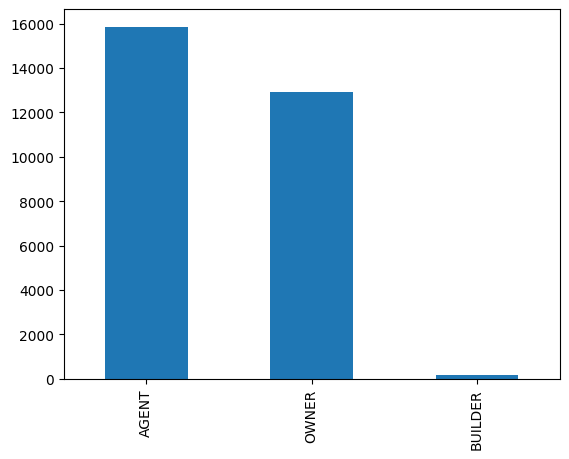

In [85]:
coluna_analise_seller_type = 'seller_type'

statis = analise_desc_num(coluna_analise_seller_type)


print(statis)
df[coluna_analise_seller_type].value_counts().plot(kind='bar')

#### Coluna - 'layout_type'

{'MEDIA': 14472, 'MODA': 27617, 'MEDIANA': 14472.0, 'DESVIO PADRAO': 18589.837277394334, 'QUARTIS': [-5245.5, 14472.0, 34189.5]}


<AxesSubplot: >

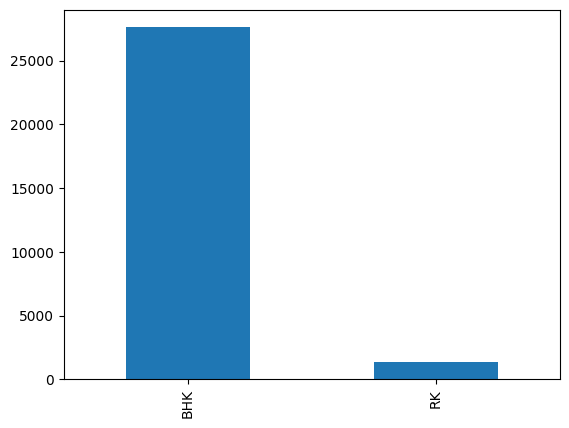

In [86]:
coluna_analise_layout_type = 'layout_type'

statis = analise_desc_num(coluna_analise_layout_type)


print(statis)
df[coluna_analise_layout_type].value_counts().plot(kind='bar')

#### Coluna - 'property_type'

{'MEDIA': 4824, 'MODA': 19549, 'MEDIANA': 2359.5, 'DESVIO PADRAO': 7400.188592191418, 'QUARTIS': [333.25, 2359.5, 8053.0]}


<AxesSubplot: >

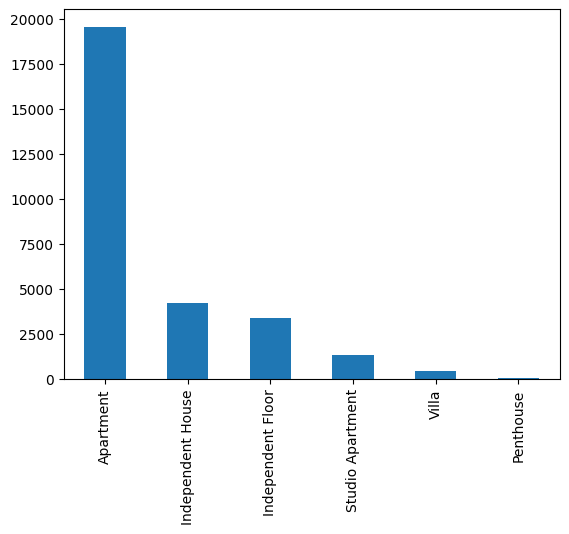

In [87]:
coluna_analise_property_type = 'property_type'

statis = analise_desc_num(coluna_analise_property_type)


print(statis)
df[coluna_analise_property_type].value_counts().plot(kind='bar')

### Analise do preco por atributo da coluna descritiva

#### Coluna - 'bathroom' x 'price'

<AxesSubplot: xlabel='price', ylabel='bathroom'>

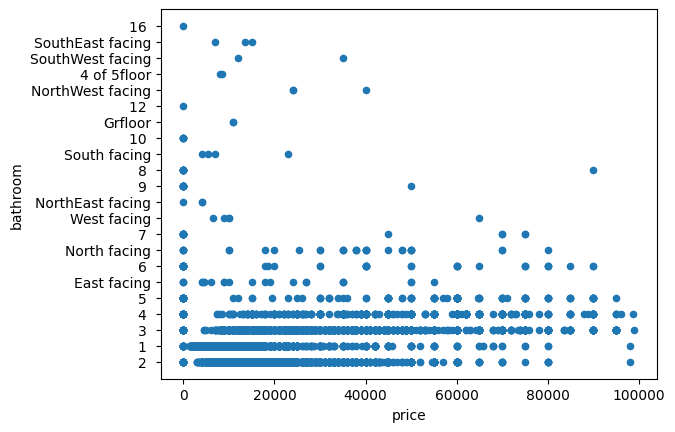

In [110]:
coluna_analise_banheiro_x_preco = 'bathroom'

df.plot(kind='scatter', x='price', y=coluna_analise_banheiro_x_preco)

<AxesSubplot: xlabel='bathroom'>

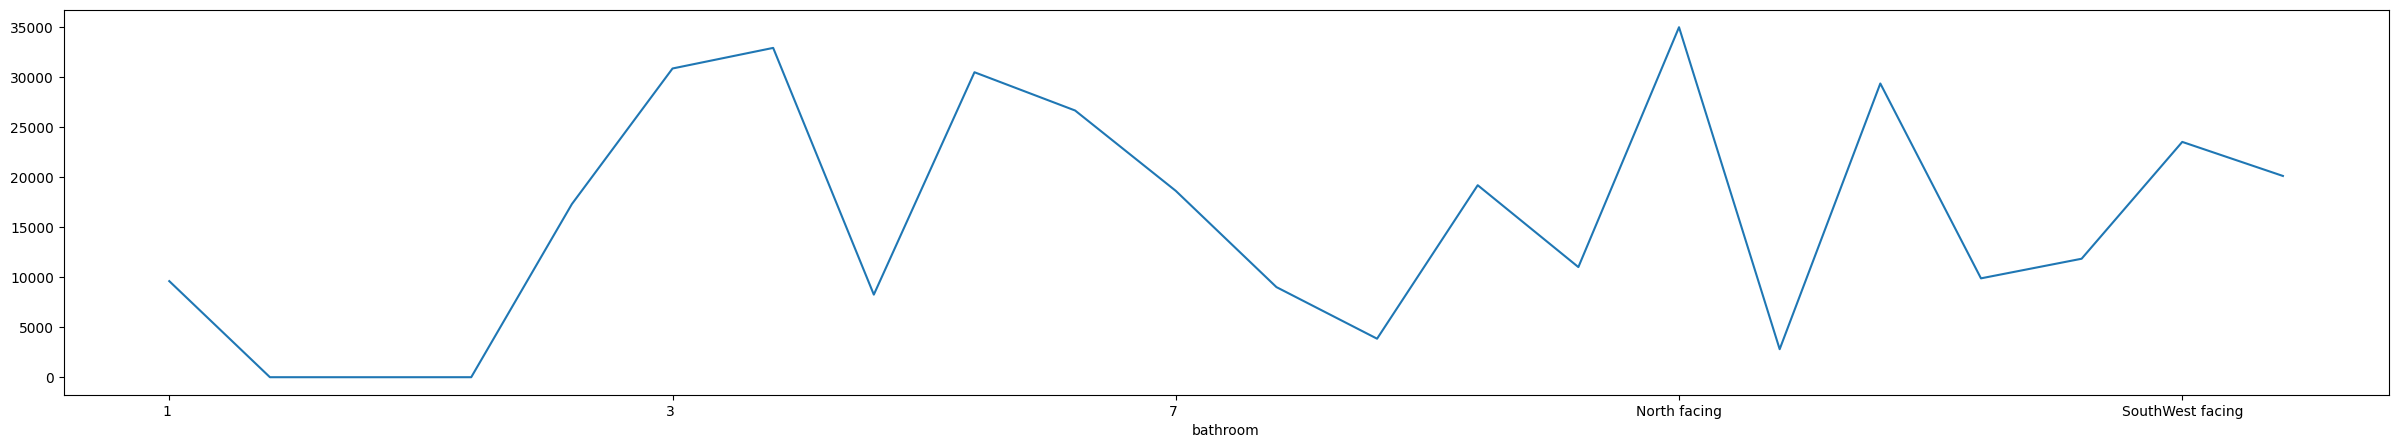

In [109]:
df.groupby(coluna_analise_banheiro_x_preco)['price'].mean().plot(kind='line', rot=0, figsize=(30,5))

#### Coluna - 'area' x 'price'

<AxesSubplot: xlabel='price', ylabel='area'>

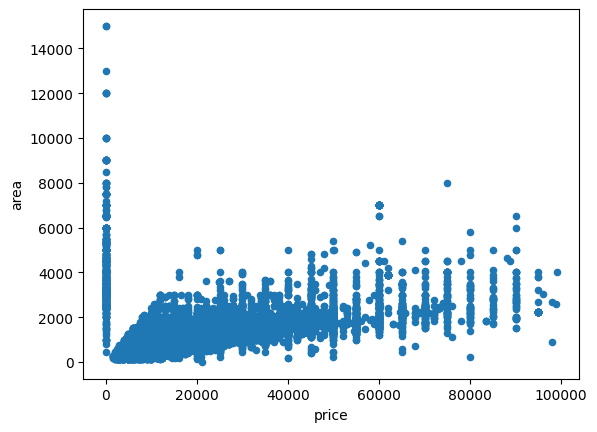

In [111]:
coluna_analise_area_x_preco = 'area'

df.plot(kind='scatter', x='price', y=coluna_analise_area_x_preco)

<AxesSubplot: xlabel='area'>

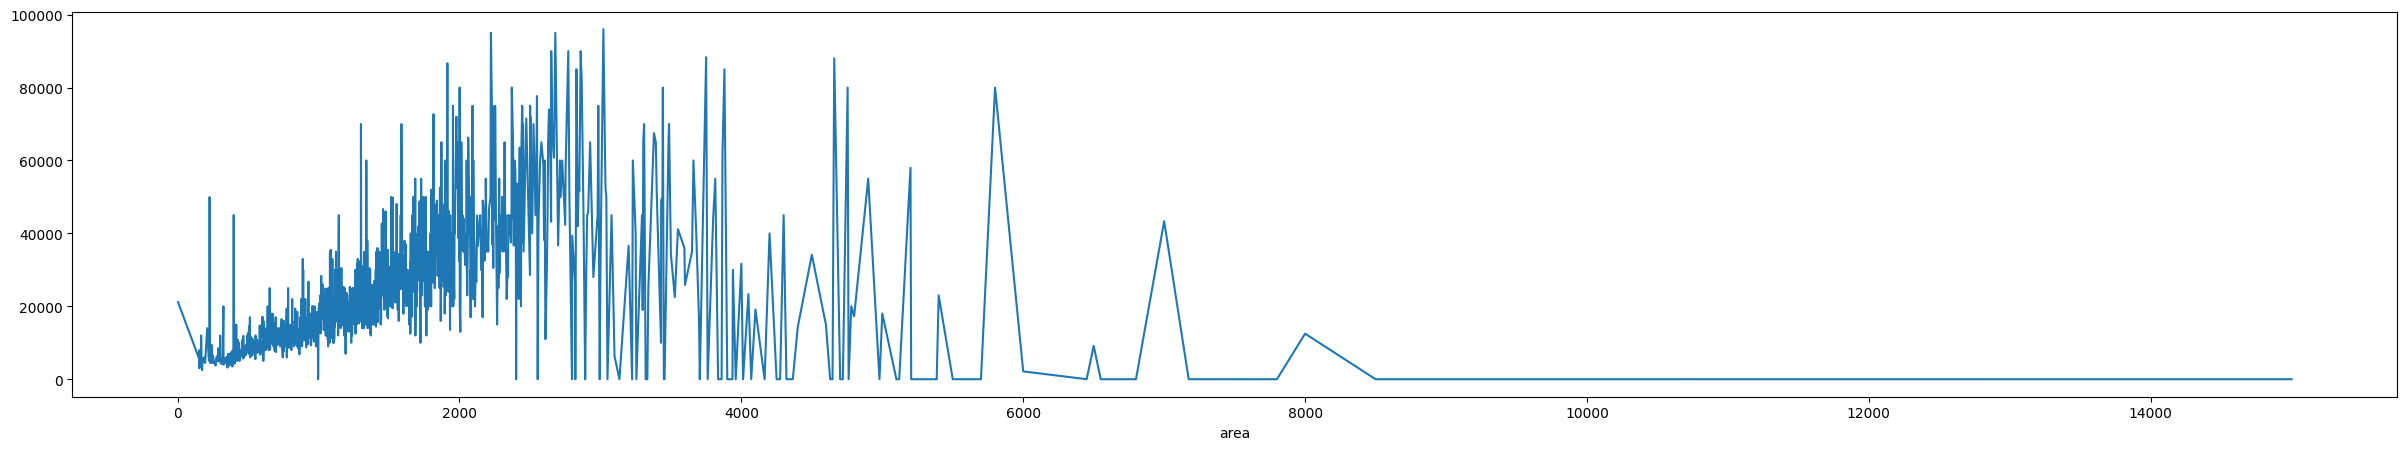

In [112]:
df.groupby(coluna_analise_area_x_preco)['price'].mean().plot(kind='line', rot=0, figsize=(30,5))

#### Coluna - 'seller_type' x 'price'

{'AGENT': {'MEDIA': 20560.18, 'MODA': 15000.0, 'MEDIANA': 17000.0, 'DESVIO PADRAO': 14850.69, 'QUARTIS': [10000.0, 17000.0, 25000.0]}, 'OWNER': {'MEDIA': 14225.37, 'MODA': 10000.0, 'MEDIANA': 12000.0, 'DESVIO PADRAO': 9823.15, 'QUARTIS': [8000.0, 12000.0, 17000.0]}, 'BUILDER': {'MEDIA': 27834.4, 'MODA': 30000.0, 'MEDIANA': 27000.0, 'DESVIO PADRAO': 18661.92, 'QUARTIS': [10500.0, 27000.0, 42000.0]}}


<AxesSubplot: xlabel='price', ylabel='seller_type'>

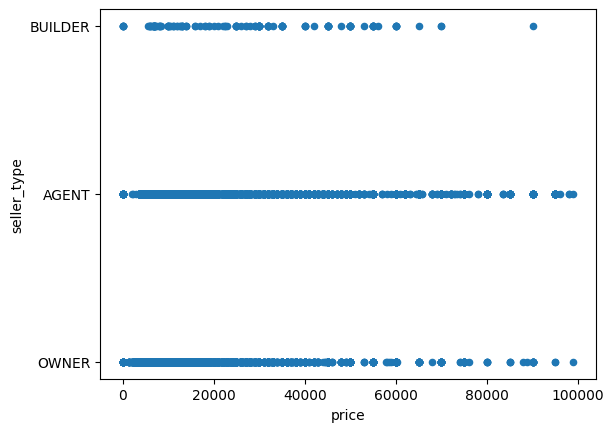

In [88]:
coluna_analise_seller_type_x_preco = 'seller_type'

statis = analise_preco(coluna_analise_seller_type_x_preco)
print(statis)


df.plot(kind='scatter', x='price', y=coluna_analise_seller_type_x_preco)


<AxesSubplot: ylabel='price'>

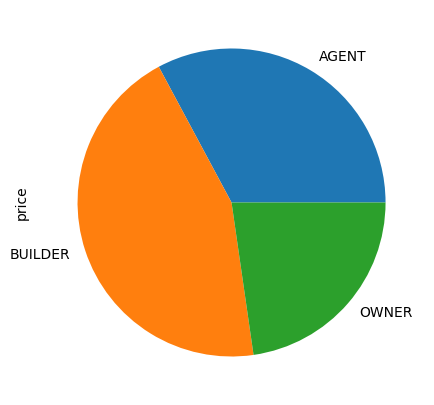

In [89]:
df.groupby(coluna_analise_seller_type_x_preco)['price'].mean().plot(kind='pie', rot=0, figsize=(15,5))

#### Coluna - 'layout_type' x 'price'

{'BHK': {'MEDIA': 18251.15, 'MODA': 15000.0, 'MEDIANA': 15000.0, 'DESVIO PADRAO': 13312.44, 'QUARTIS': [10000.0, 15000.0, 22000.0]}, 'RK': {'MEDIA': 7635.44, 'MODA': 5000.0, 'MEDIANA': 6000.0, 'DESVIO PADRAO': 6713.66, 'QUARTIS': [5000.0, 6000.0, 8000.0]}}


<AxesSubplot: xlabel='price', ylabel='layout_type'>

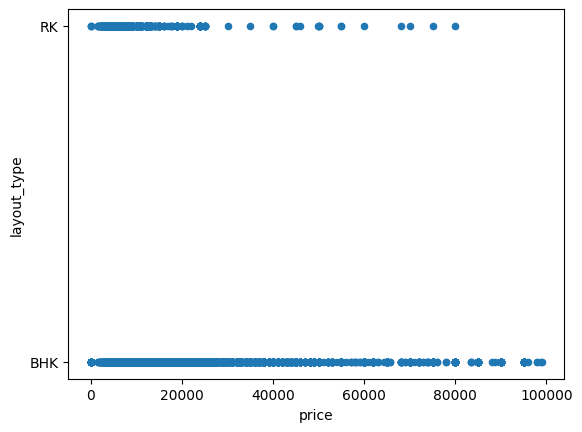

In [90]:
coluna_analise_layout_type_x_preco = 'layout_type'

statis = analise_preco(coluna_analise_layout_type_x_preco)
print(statis)


df.plot(kind='scatter', x='price', y=coluna_analise_layout_type_x_preco)

<AxesSubplot: ylabel='price'>

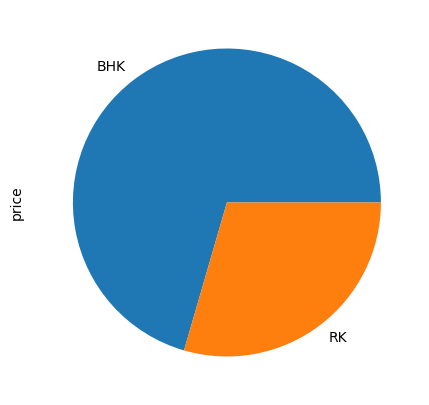

In [91]:
df.groupby(coluna_analise_layout_type_x_preco)['price'].mean().plot(kind='pie', rot=0, figsize=(15,5))

#### Coluna - 'property_type' x 'price'

{'Apartment': {'MEDIA': 19714.58, 'MODA': 15000.0, 'MEDIANA': 16000.0, 'DESVIO PADRAO': 13265.0, 'QUARTIS': [11000.0, 16000.0, 25000.0]}, 'Independent House': {'MEDIA': 13795.22, 'MODA': 10000.0, 'MEDIANA': 10000.0, 'DESVIO PADRAO': 12549.78, 'QUARTIS': [7000.0, 10000.0, 15000.0]}, 'Independent Floor': {'MEDIA': 14422.71, 'MODA': 10000.0, 'MEDIANA': 11500.0, 'DESVIO PADRAO': 10502.57, 'QUARTIS': [8000.0, 11500.0, 17000.0]}, 'Studio Apartment': {'MEDIA': 7635.44, 'MODA': 5000.0, 'MEDIANA': 6000.0, 'DESVIO PADRAO': 6713.66, 'QUARTIS': [5000.0, 6000.0, 8000.0]}, 'Villa': {'MEDIA': 25692.91, 'MODA': 30000.0, 'MEDIANA': 22000.0, 'DESVIO PADRAO': 22062.81, 'QUARTIS': [9000.0, 22000.0, 35000.0]}, 'Penthouse': {'MEDIA': 13183.25, 'MODA': 6666.0, 'MEDIANA': 8500.0, 'DESVIO PADRAO': 12833.5, 'QUARTIS': [6391.5, 8500.0, 13000.0]}}


<AxesSubplot: xlabel='price', ylabel='property_type'>

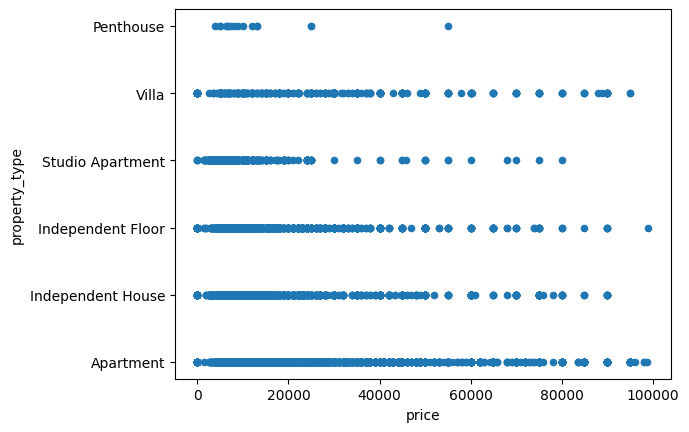

In [92]:
coluna_analise_property_type_x_preco = 'property_type'

statis = analise_preco(coluna_analise_property_type_x_preco)
print(statis)


df.plot(kind='scatter', x='price', y=coluna_analise_property_type_x_preco)

<AxesSubplot: ylabel='price'>

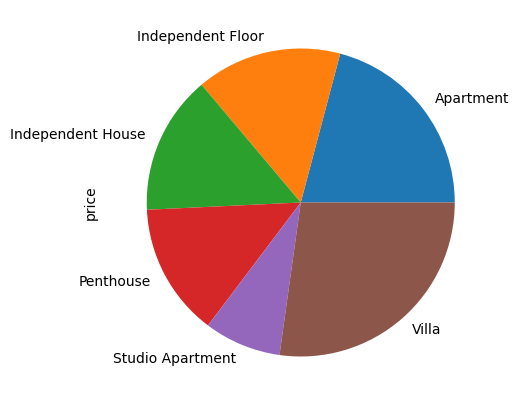

In [93]:
df.groupby(coluna_analise_property_type)['price'].mean().plot(kind='pie', rot=0, figsize=(15,5))